# Final Project - SQL - Online book platform analysis

## Goals of the study   

Provide some insights for a startup company developing a new app for book lovers which will allow them generate a value proposition for the new product.
The dataset contains data on books, publishers, authors, and customer ratings and reviews of books.   

**Description of the data**  

***books***  
Contains data on books:  
•	book_id  
•	author_id  
•	title  
•	num_pages — number of pages  
•	publication_date  
•	publisher_id   

***authors***  
Contains data on authors:  
•	author_id 
•	author   

***publishers***  
Contains data on publishers:  
•	publisher_id  
•	publisher   

***ratings***  
Contains data on user ratings:   
•	rating_id  
•	book_id  
•	username — the name of the user who rated the book  
•	rating  

**reviews**  
Contains data on customer reviews:  
•	review_id  
•	book_id  
•	username — the name of the user who reviewed the book  
•	text — the text of the review

**Data diagram**
!https://s3-us-west-2.amazonaws.com/secure.notion-static.com/5a5cff26-7d06-45cb-8333-37837bbd1a81/Untitled.png 


**Tasks:**
1. 	Find the number of books released after January 1, 2000.  
2. 	Find the number of user reviews and the average rating for each book.  
3.  Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).  
4. 	Identify the author with the highest average book rating (look only at books with at least 50 ratings).  
5.	Find the average number of text reviews among users who rated more than 50 books.

**Database scheme**

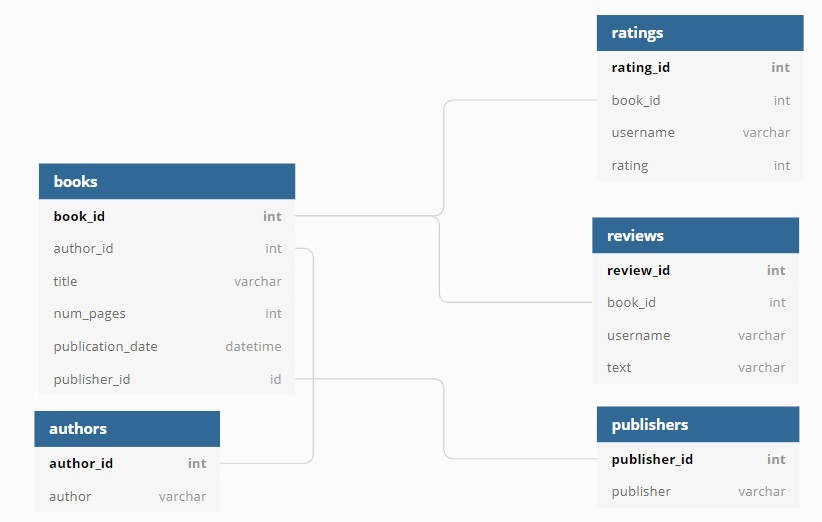

## Connecting to the database

In [1]:
# import libraries and connecting to the database
import sys
import getopt
from datetime import datetime
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Studying the tables

In [2]:
query="""
SELECT * 
FROM books
"""

In [3]:
books = pd.io.sql.read_sql(query, con = engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
books.duplicated().sum()

0

In [6]:
books.isna().sum()

book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64

In [7]:
query1="""
SELECT * 
FROM authors
"""

In [8]:
authors = pd.io.sql.read_sql(query1, con = engine)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [9]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [10]:
authors.isna().sum()

author_id    0
author       0
dtype: int64

In [11]:
authors.duplicated().sum()

0

In [12]:
query2="""
SELECT * 
FROM publishers
"""

In [13]:
publishers = pd.io.sql.read_sql(query2, con = engine)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [14]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [15]:
publishers.isna().sum()

publisher_id    0
publisher       0
dtype: int64

In [16]:
publishers.duplicated().sum()

0

In [17]:
query3="""
SELECT * 
FROM ratings
"""

In [18]:
ratings = pd.io.sql.read_sql(query3, con = engine)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [20]:
ratings.isna().sum()

rating_id    0
book_id      0
username     0
rating       0
dtype: int64

In [21]:
ratings.duplicated().sum()

0

In [22]:
query4="""
SELECT * 
FROM reviews
"""

In [23]:
reviews = pd.io.sql.read_sql(query4, con = engine)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


In [25]:
reviews.isna().sum()

review_id    0
book_id      0
username     0
text         0
dtype: int64

In [26]:
reviews.duplicated().sum()

0

## Tasks

### Find the number of books released after January 1, 2000

In [27]:
query5="""
SELECT COUNT (DISTINCT book_id) as num_books
    FROM books
    WHERE publication_date > '2000-01-01'
    """

In [28]:
books_released = pd.io.sql.read_sql(query5, con = engine)
books_released

,num_books
0,819


There are 819 books released after January 1, 2000.

### Find the number of user reviews and the average rating for each book

In [38]:
query6="""
SELECT b.title,
       rat.avg_rating AS avg_rating,
       rev.total_reviews AS total_reviews
FROM books AS b
LEFT OUTER JOIN (SELECT book_id AS book_id,
                   COUNT(review_id) AS total_reviews
            FROM reviews
            GROUP BY book_id) AS rev ON b.book_id = rev.book_id
LEFT OUTER JOIN (SELECT book_id AS book_id,
                   AVG(rating) AS avg_rating
            FROM ratings
            GROUP BY book_id) AS rat ON rev.book_id = rat.book_id
ORDER BY avg_rating DESC, total_reviews DESC
"""

In [39]:
rating_and_reviews = pd.io.sql.read_sql(query6, con = engine)
rating_and_reviews.head(15)

,title,avg_rating,total_reviews
0,'Salem's Lot,3.666667,2.0
1,1 000 Places to See Before You Die,2.500000,1.0
2,13 Little Blue Envelopes (Little Blue Envelope...,4.666667,3.0
3,1491: New Revelations of the Americas Before C...,4.500000,2.0
4,1776,4.000000,4.0
5,1st to Die (Women's Murder Club #1),3.500000,4.0
6,2nd Chance (Women's Murder Club #2),3.000000,3.0
7,4th of July (Women's Murder Club #4),4.000000,3.0
8,A Beautiful Mind,4.250000,2.0
9,A Bend in the Road,3.200000,3.0


994 books have user reviews and rating.   
A Dirty Job (Grim Reaper #1), Moneyball: The Art of Winning an Unfair Game, School's Out—Forever (Maximum Ride #2), Evening Class, Crucial Conversations: Tools for Talking When Stakes are High, and many more have an average rating of 5.

### Identify the publisher that has released the greatest number of books with more than 50 pages

In [31]:
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [32]:
query7="""
SELECT p.publisher as publisher,
       COUNT(b.book_id) AS number_of_books
FROM books AS b
LEFT OUTER JOIN publishers as p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY b.publisher_id, p.publisher
ORDER BY number_of_books DESC
LIMIT 1
"""

In [33]:
top_publisher = pd.io.sql.read_sql(query7, con = engine)
top_publisher

,publisher,number_of_books
0,Penguin Books,42


Penguin Books is the publisher that has released the greatest number of books with more than 50 pages - 42 books.

### Identify the author with the highest average book rating: look only at books with at least 50 ratings

In [34]:
query8="""
SELECT author AS rated_author,
       AVG(book_rating) AS avg_book_rating
FROM 
(SELECT b.book_id,
       b.author_id AS author_id,
       a.author AS author,
       AVG(r.rating) AS book_rating
FROM books AS b
LEFT OUTER JOIN authors AS a ON b.author_id=a.author_id
LEFT OUTER JOIN ratings AS r ON b.book_id=r.book_id
GROUP BY b.book_id, a.author_id, a.author) AS t
WHERE book_id IN (SELECT book_id
                    FROM ratings
                    GROUP BY book_id
                    HAVING COUNT(rating_id) > 50)
GROUP BY rated_author
ORDER BY avg_book_rating DESC
LIMIT 1
"""

In [35]:
top_author = pd.io.sql.read_sql(query8, con = engine)
top_author

,rated_author,avg_book_rating
0,J.K. Rowling/Mary GrandPré,4.283844


The author with the highest average book rating and with at least 50 ratings per book is J.K. Rowling and average book rating 4.28.

### Find the average number of text reviews among users who rated more than 50 books

In [36]:
query9="""
SELECT AVG(COUNT)
FROM (SELECT username, 
             COUNT(text)
      FROM reviews as re
      WHERE re.username IN (SELECT r.username
                       FROM ratings r
                       GROUP BY r.username
                       HAVING COUNT(r.rating) > 50)
GROUP BY username) as counts
"""

In [37]:
avg_text_reviews = pd.io.sql.read_sql(query9, con = engine)
avg_text_reviews

,avg
0,24.333333


The average number of text reviews among users who rated more than 50 books is 24.33.

## Final conclusions

- No duplicates or missing values were found in the datasets.
- The total number of books on the platform is 1000.
- There are 819 books that were released after January 1, 2000. 
- 994 books have user reviews and rating.     
- A Dirty Job (Grim Reaper #1), Moneyball: The Art of Winning an Unfair Game, School's Out—Forever (Maximum Ride #2), Evening Class, Crucial Conversations: Tools for Talking When Stakes are High, and many more have an average rating of 5.  
- Penguin Books is the publisher with the greatest number of books on the platform.
- The author with the highest average book rating and with at least 50 ratings per book is J.K. Rowling and average book rating of 4.28.
- The average number of text reviews among users who rated more than 50 books is 24.33.